In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nettools.multiplex import InterMeasures
from nettools.utils import load_multinet_by_name

# Load Datasets

In reaserch I use *London Transportation*, *European Airplanes* and *FAO Trade Network*

In [2]:
network_london = load_multinet_by_name('london')

In [3]:
network_fao = load_multinet_by_name('fao')

In [4]:
network_euair = load_multinet_by_name('EUAir')

# Construct network attributes dictionary
**InterMeasures** object accept dictionary with network parameters, but
it's possible to pass database name instead.

### *European Airlines* Network properties

In [5]:
network_attrs_eu = {}
network_attrs_eu['loaded_network'] = network_euair[0]
network_attrs_eu['network_graph_np'] = network_euair[1]
network_attrs_eu['network_weights_np'] = network_euair[2]
network_attrs_eu['mapping'] = network_euair[3]
network_attrs_eu['layers_attr'] = network_euair[4]

### *London Transportation* Network properties

In [6]:
network_attrs_lt = {}
network_attrs_lt['loaded_network'] = network_london[0]
network_attrs_lt['network_graph_np'] = network_london[1]
network_attrs_lt['network_weights_np'] = network_london[2]
network_attrs_lt['mapping'] = network_london[3]
network_attrs_lt['layers_attr'] = network_london[4]

### *FAO Trade Network* Network properties

In [7]:
network_attrs_fao = {}
network_attrs_fao['loaded_network'] = network_fao[0]
network_attrs_fao['network_graph_np'] = network_fao[1]
network_attrs_fao['network_weights_np'] = network_fao[2]
network_attrs_fao['mapping'] = network_fao[3]
network_attrs_fao['layers_attr'] = network_fao[4]

# Reasearch approach
In this notebook I will measure main coefficients, which describes how nework layers depends on each other.

Reasearch approach is adapted from *"Metrics for the analysis of multiplex networks"* Battiston et. al.

In [8]:
im_eu = InterMeasures(network_attr=network_attrs_eu)
im_lt = InterMeasures(network_attr=network_attrs_lt)
im_fao = InterMeasures(network_attr=network_attrs_fao)

# Network informations

### *European Airlines Network* information

In [9]:
pd.DataFrame(network_attrs_eu['layers_attr'].items(), columns=['id', 'name'])

,id,name
0,1,Lufthansa
1,2,Ryanair
2,3,Easyjet
3,4,British_Airways
4,5,Turkish_Airlines
5,6,Air_Berlin
6,7,Air_France
7,8,Scandinavian_Airlines
8,9,KLM
9,10,Alitalia


In [10]:
pd.DataFrame(network_attrs_eu['mapping'][0].items())

,0,1
0,0,"[1, [LCLK, 33.630278, 34.878890\n]]"
1,1,"[2, [EDDF, 8.570555, 50.033333\n]]"
2,2,"[3, [EDDK, 7.142779, 50.865833\n]]"
3,3,"[4, [EGNX, -1.328055, 52.831112\n]]"
4,4,"[5, [EGTE, -3.413888, 50.734444\n]]"
5,5,"[6, [LTBJ, 27.155001, 38.289168\n]]"
6,6,"[7, [LFPG, 2.547778, 49.009721\n]]"
7,7,"[8, [LFBO, 1.367778, 43.635002\n]]"
8,8,"[9, [EGNT, -1.691667, 55.037500\n]]"
9,9,"[10, [EDDP, 12.236388, 51.423889\n]]"


### *London Transportation* information

In [11]:
pd.DataFrame(network_attrs_lt['layers_attr'].items(), columns=['id', 'name'])

,id,name
0,1,Tube (All underground lines aggregated)
1,2,Overground
2,3,DLR


In [12]:
pd.DataFrame(network_attrs_lt['mapping'][0].items())

,0,1
0,0,"[0, [abbeyroad, 51.531951985733, 0.00373778560..."
1,1,"[1, [westham, 51.52852551818, 0.00533180725867..."
2,2,"[2, [actoncentral, 51.508757812012, -0.2634157..."
3,3,"[3, [willesdenjunction, 51.532233992929, -0.24..."
4,4,"[4, [actontown, 51.503071476856, -0.2802882961..."
5,5,"[5, [chiswickpark, 51.494370746332, -0.2677225..."
6,6,"[6, [turnhamgreen, 51.495181971972, -0.2545101..."
7,7,"[7, [aldgate, 51.514342387502, -0.075612503707..."
8,8,"[8, [liverpoolstreet, 51.517598273919, -0.0822..."
9,9,"[9, [aldgateeast, 51.515081631079, -0.07298705..."


### *FAO Trade Network* information

In [103]:
pd.DataFrame(network_attrs_fao['layers_attr'].items(), columns=['id', 'name'])

,id,name
0,1,"Beverages,_non_alcoholic"
1,2,Cream_fresh
2,3,Food_prep_nes
3,4,"Cheese,_whole_cow_milk"
4,5,Cigarettes
5,6,Cotton_lint
6,7,"Eggs,_hen,_in_shell"
7,8,Bananas
8,9,Chickens
9,10,Forage_products


In [14]:
pd.DataFrame(network_attrs_fao['mapping'][0].items())

,0,1
0,0,"[1, [Afghanistan\n]]"
1,1,"[2, [Australia\n]]"
2,2,"[3, [Austria\n]]"
3,3,"[4, [Belgium\n]]"
4,4,"[5, [Brazil\n]]"
5,5,"[6, [Canada\n]]"
6,6,"[7, [China\n]]"
7,7,"[8, [China,_Hong_Kong_SAR\n]]"
8,8,"[9, [China,_mainland\n]]"
9,9,"[10, [China,_Taiwan_Province_of\n]]"


# Degree distribution

In first step I will study degree distribution for each network. By multiplex network degree distribution I understand degree dristribution for each layer and correlation between them.

### *European Airlines* Network

In [15]:
degree_distribution_eu = im_eu.degree_distribution(im_eu.get_network_adjacency())
kcorr_eu = im_eu.kendal_corr(degree_distribution_eu)

Plot correlation between layers

<IPython.core.display.Javascript object>


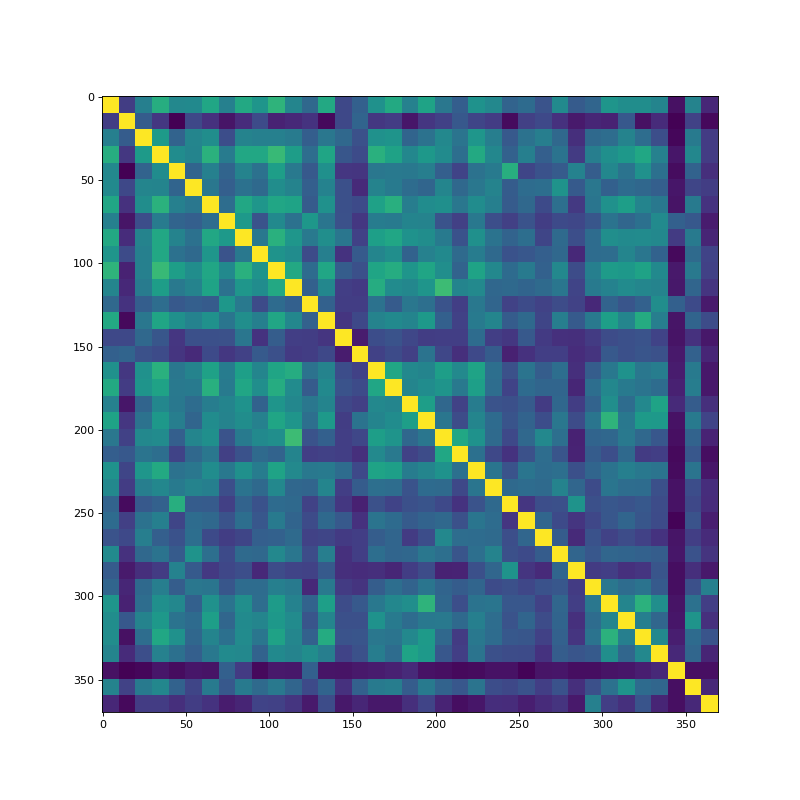

In [18]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
kcorr_reshaped_eu = np.repeat(np.repeat(kcorr_eu, 10, axis=0), 10, axis=1)
plt.imshow(kcorr_reshaped_eu)
plt.show()


### *London Transportation Network* Network

In [19]:
degree_distribution_lt = im_lt.degree_distribution(im_lt.get_network_adjacency())
degree_agg_net_lt = im_lt.degree_distribution(im_lt.agg_net)
kcorr_lt = im_lt.kendal_corr(degree_distribution_lt)

#### **Degree distribution**

<IPython.core.display.Javascript object>


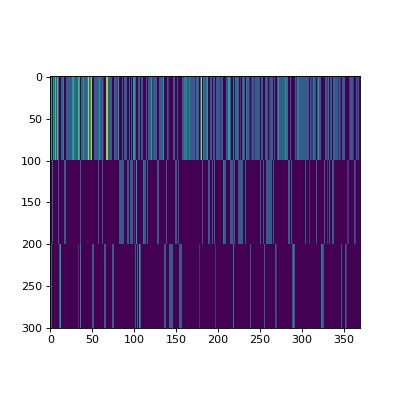

In [20]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(degree_distribution_lt, 100, axis=0))
plt.show()

<IPython.core.display.Javascript object>


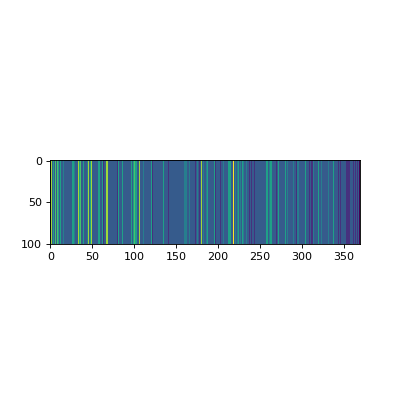

In [21]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(degree_agg_net_lt[:, np.newaxis].T, 100, axis=0))
plt.show()

#### **Kendal correlation**

<IPython.core.display.Javascript object>


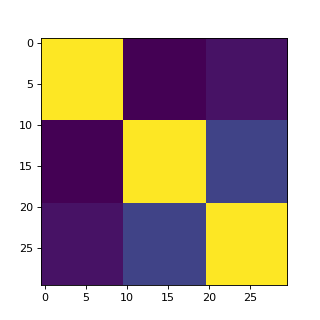

In [22]:
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
kcorr_reshaped_lt = np.repeat(np.repeat(kcorr_lt, 10, axis=0), 10, axis=1)
plt.imshow(kcorr_reshaped_lt)
plt.show()

### *FAO Trade Network* Network properties

#### **Kendal correlation**

In [23]:
degree_distribution_fao = im_fao.degree_distribution(im_fao.get_network_adjacency())
kcorr_fao = im_fao.kendal_corr(degree_distribution_fao)

<IPython.core.display.Javascript object>


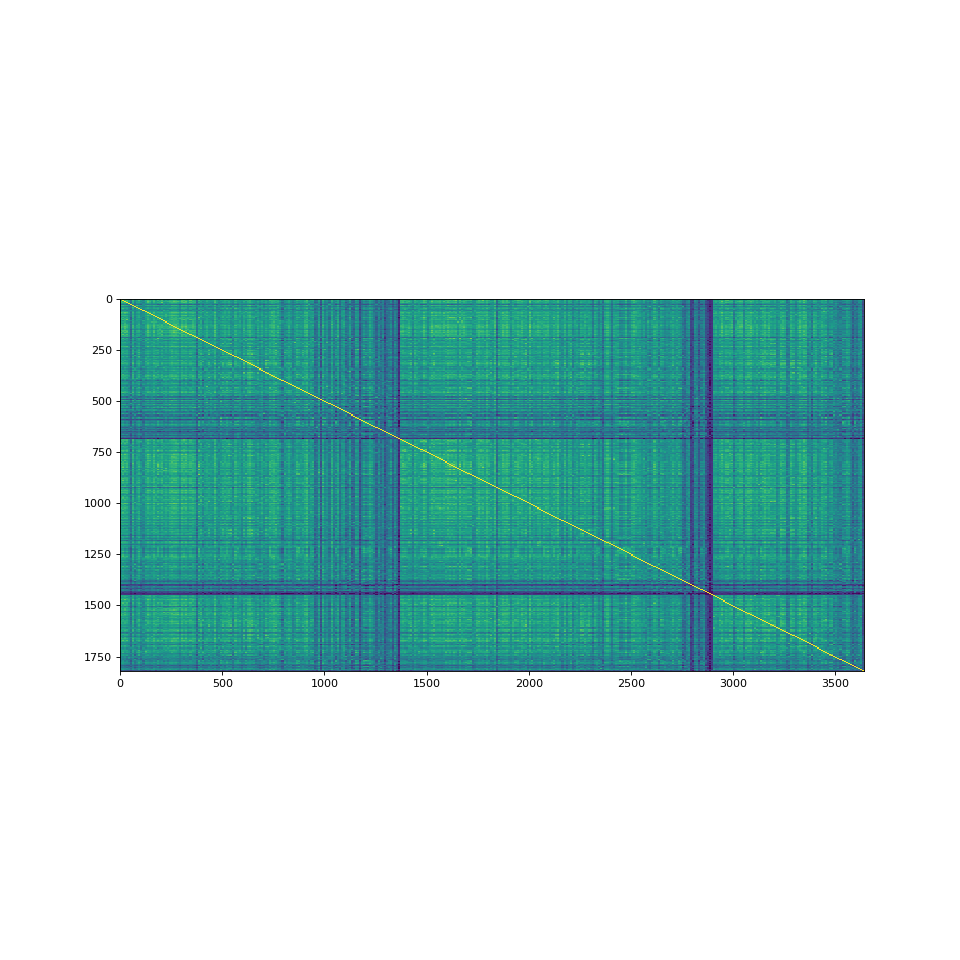

In [129]:
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
kcorr_reshaped_fao = np.repeat(np.repeat(kcorr_fao, 5, axis=0), 10, axis=1)
plt.imshow(kcorr_reshaped_fao)
plt.show()

# Participation coefficient
Layer degree distribution don't give us full information about network. When aggregated network is examined
nodes with same degree could be found, but in reality they participate in two different layers equally or strong in one layer.

### *European Airlines* Network

/home/filip/PycharmProjects/nettools/nettools/multiplex/interdependence.py:221: RuntimeWarning: invalid value encountered in divide
  d_net = (np.sum(network, axis=1) / agg_rep)**2


<IPython.core.display.Javascript object>


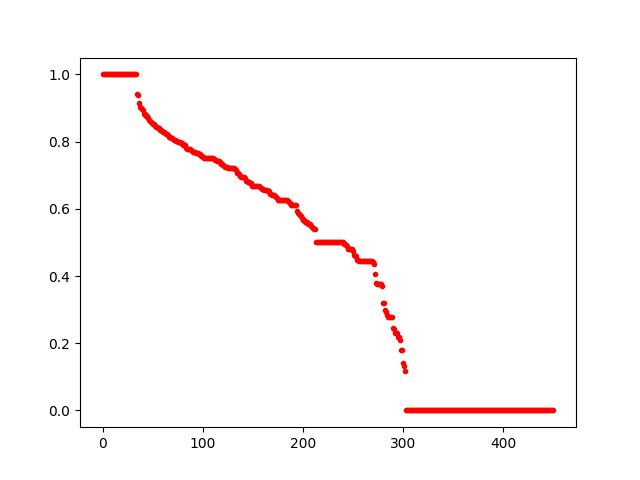

In [24]:
pc_eu = im_eu.participation_coeff(im_eu.get_network_adjacency(), im_eu.agg_net)
plt.figure()
plt.plot(np.sort(pc_eu)[::-1], '.r')
plt.show()

### *London Transportation Network* Network

<IPython.core.display.Javascript object>


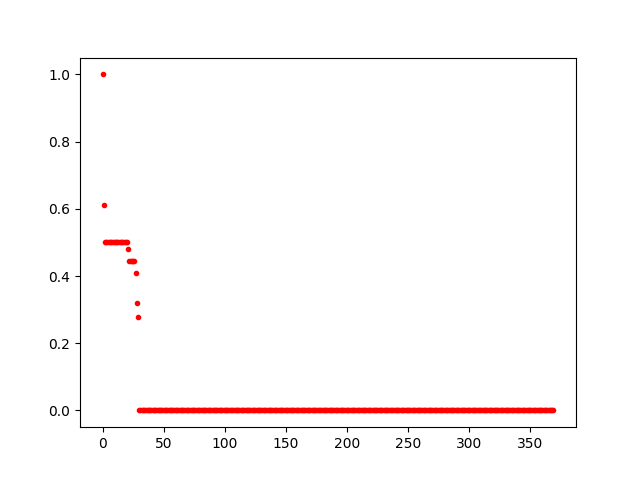

In [25]:
pc_lt = im_lt.participation_coeff(im_lt.get_network_adjacency(), im_lt.agg_net)
plt.figure()
plt.plot(np.sort(pc_lt)[::-1], '.r')
plt.show()

### *FAO Trade Network* Network properties

<IPython.core.display.Javascript object>


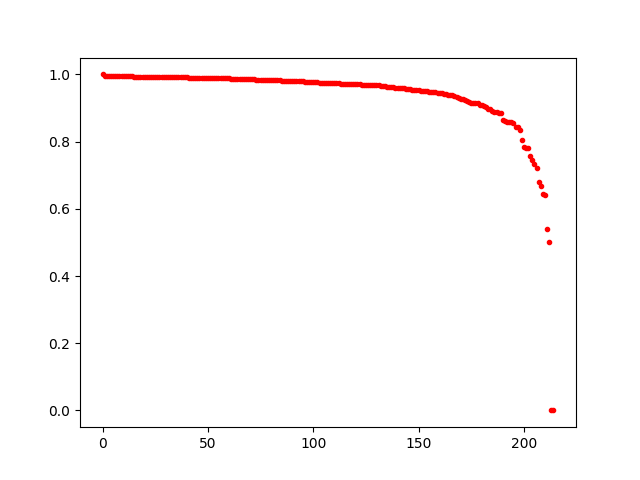

In [26]:
pc_fao = im_fao.participation_coeff(im_fao.get_network_adjacency(), im_fao.agg_net)
plt.figure()
plt.plot(np.sort(pc_fao)[::-1], '.r')
plt.show()

## Participation Coefficient and Aggregated Degree 

### *European Airlines* Network

In [30]:
degree_agg_net_eu = im_eu.degree_distribution(im_eu.agg_net)
z_score_eu = (degree_agg_net_eu - np.mean(degree_agg_net_eu)) / np.std(degree_agg_net_eu)

<IPython.core.display.Javascript object>


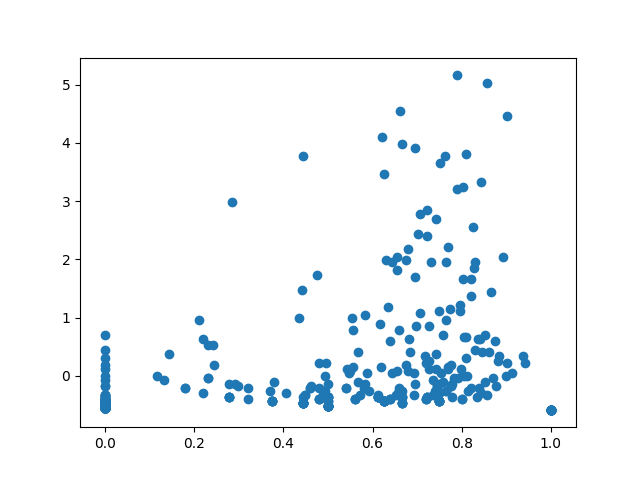

In [35]:
plt.figure()
plt.scatter(pc_eu, z_score_eu)
plt.show()

### *London Transportation Network* Network

In [36]:
degree_agg_net_lt = im_lt.degree_distribution(im_lt.agg_net)
z_score_lt = (degree_agg_net_lt - np.mean(degree_agg_net_lt)) / np.std(degree_agg_net_lt)

<IPython.core.display.Javascript object>


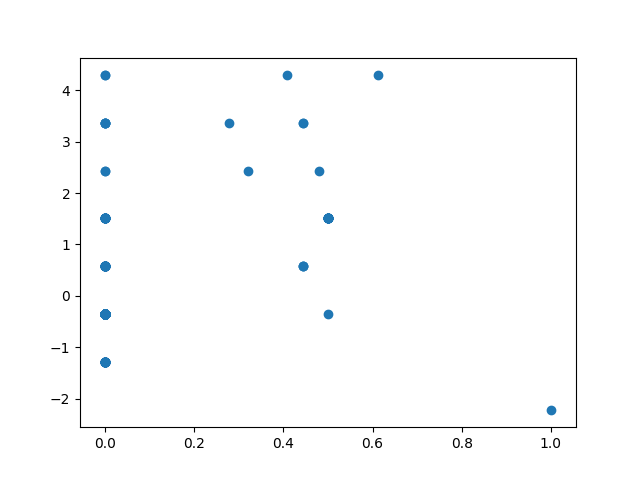

In [37]:
plt.figure()
plt.scatter(pc_lt, z_score_lt)
plt.show()

### *FAO Trade Network* Network properties

In [39]:
degree_agg_net_fao = im_fao.degree_distribution(im_fao.agg_net)
z_score_fao = (degree_agg_net_fao - np.mean(degree_agg_net_fao)) / np.std(degree_agg_net_fao)

<IPython.core.display.Javascript object>


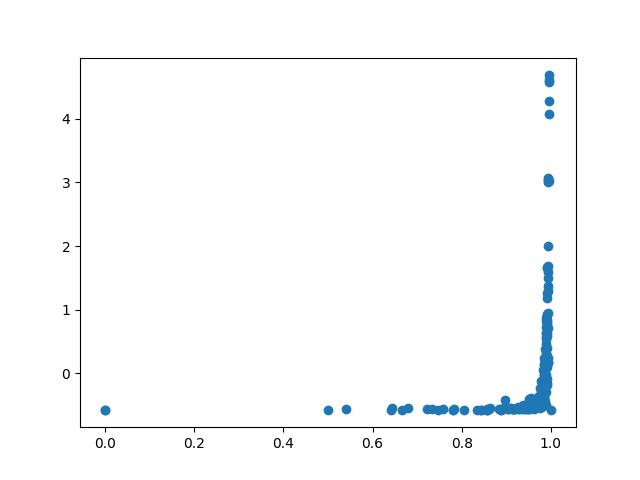

In [48]:
ax = plt.figure()
plt.scatter(pc_fao, z_score_fao)
# Annotation
# for i in range(len(pc_fao)):
#     plt.annotate(i, (pc_fao[i],z_score_fao[i]))
plt.show()

## Probability approach
In case of measuring layer importance as a whole we can compute probability of finding link at layer test_layer given reference layer.

### *European Airlines* Network

<IPython.core.display.Javascript object>


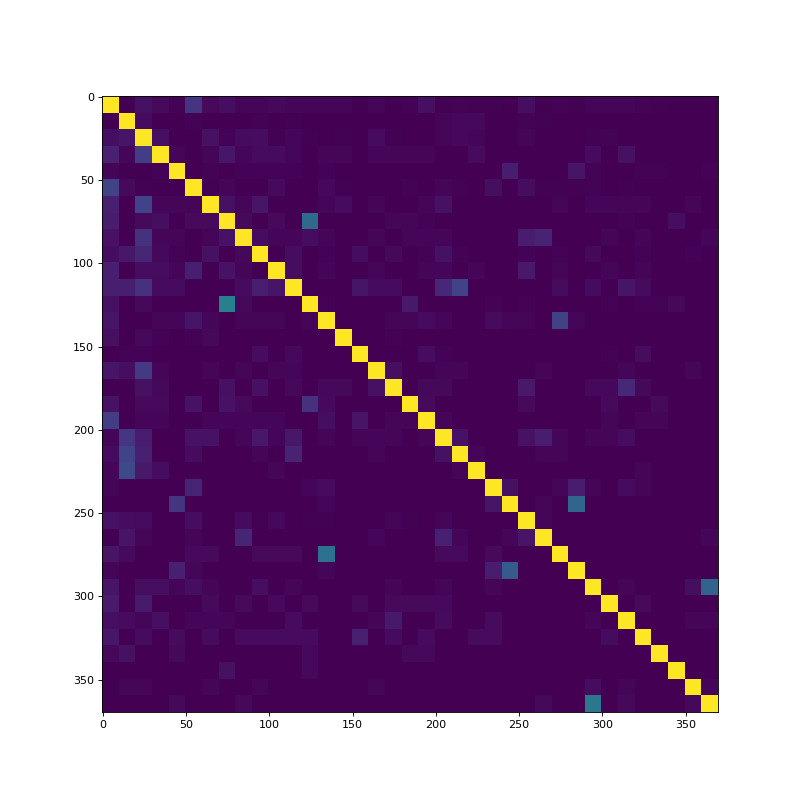

In [49]:
proba_eu = im_eu.degree_layer_dependence(im_eu.get_network_adjacency())
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_eu = np.repeat(np.repeat(proba_eu, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_eu)
plt.show()


In [69]:
"Most independent layer, according to probability measure: {}".format(np.argmin(np.sum(proba_eu,axis=1)))

'Most independent layer, according to probability measure: 34'

### *London Transportation Network* Network

<IPython.core.display.Javascript object>


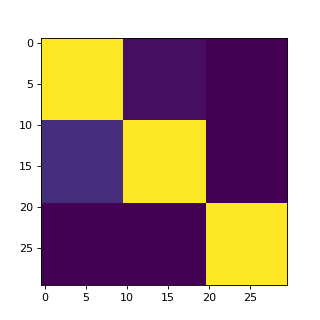

In [70]:
proba_lt = im_lt.degree_layer_dependence(im_lt.get_network_adjacency())
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_lt = np.repeat(np.repeat(proba_lt, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_lt)
plt.show()

In [74]:
"Most independent layer, according to probability measure: {}".format(np.argmin(np.sum(proba_lt,axis=1)))

'Most independent layer, according to probability measure: 2'

### *FAO Trade Network* Network properties

<IPython.core.display.Javascript object>


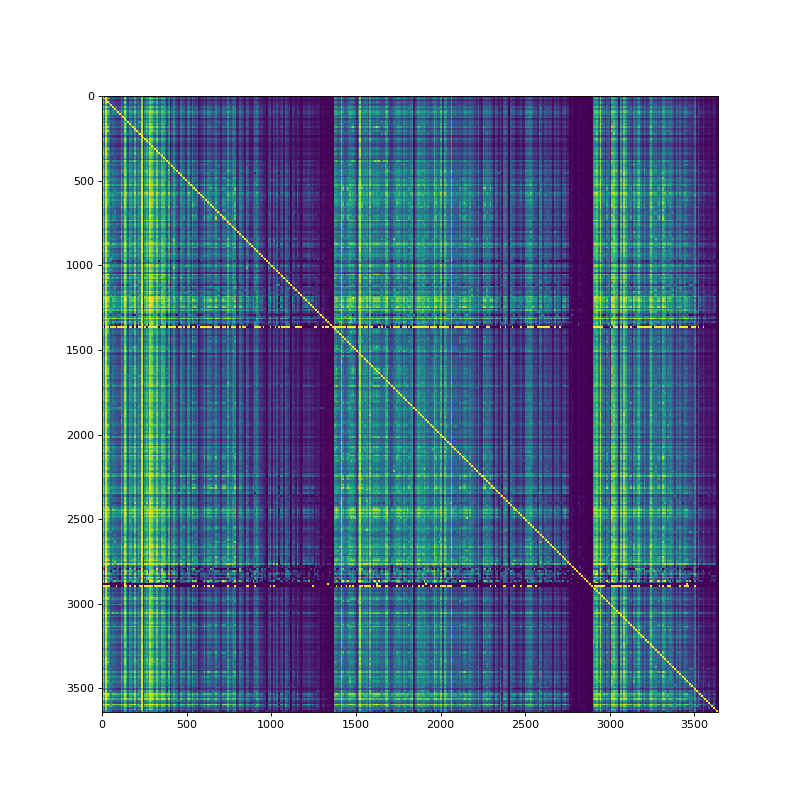

In [76]:
proba_fao = im_fao.degree_layer_dependence(im_fao.get_network_adjacency())
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_fao = np.repeat(np.repeat(proba_fao, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_fao)
plt.show()

In [77]:
"Most independent layer, according to probability measure: {}".format(np.argmin(np.sum(proba_fao,axis=1)))

'Most independent layer, according to probability measure: 288'

## Probability approach with aggregated layer
Testing probability approach with aggregated layer, for each layer probability of finding a link at layer test_layer given aggregated layer is computed.

### *European Airlines* Network

In [109]:
n_layers = im_eu.get_network_adjacency().shape[-1]
layer_scores_eu = []
for layer_idx in range(n_layers):
    proba_layer_eu = im_eu.degree_conditional(im_eu.agg_net, im_eu.get_network_adjacency()[:, :, layer_idx])
    layer_scores_eu.append(proba_layer_eu)
fin_scores_eu = np.sort(layer_scores_eu)
fin_arg_scores = np.argsort(layer_scores_eu)

<IPython.core.display.Javascript object>


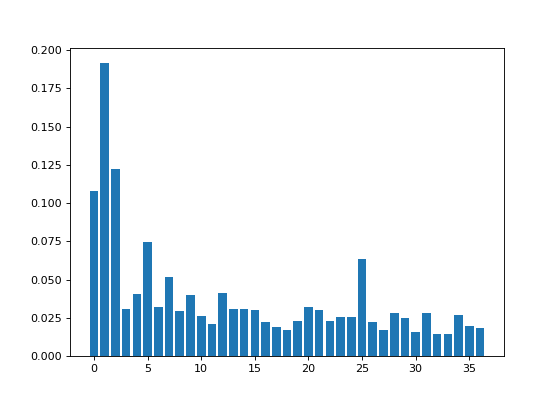

In [110]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_eu)
plt.show()

### *London Transportation Network* Network

In [107]:
n_layers = im_lt.get_network_adjacency().shape[-1]
layer_scores_lt = []
for layer_idx in range(n_layers):
    proba_layer_lt = im_lt.degree_conditional(im_lt.agg_net, im_lt.get_network_adjacency()[:, :, layer_idx])
    layer_scores_lt.append(proba_layer_lt)
fin_scores_lt = layer_scores_lt[:15]

<IPython.core.display.Javascript object>


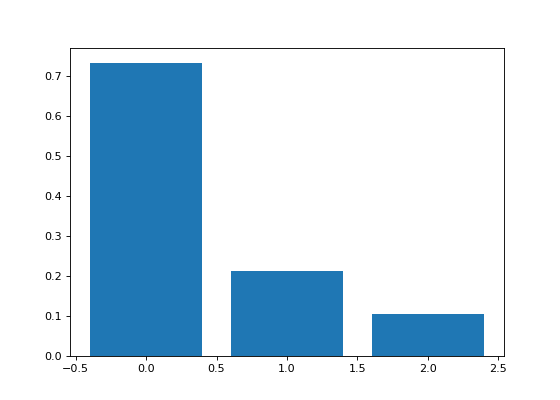

In [108]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(range(len(fin_scores_lt)), fin_scores_lt)
plt.show()

### *FAO Trade Network* Network properties

In [105]:
n_layers = im_fao.get_network_adjacency().shape[-1]
layer_scores_fao = []
for layer_idx in range(n_layers):
    proba_layer_fao = im_fao.degree_conditional(im_fao.agg_net, im_fao.get_network_adjacency()[:, :, layer_idx])
    layer_scores_fao.append(proba_layer_fao)
fin_scores_fao = np.sort(layer_scores_fao)
fin_arg_scores = np.argsort(layer_scores_fao)

<IPython.core.display.Javascript object>


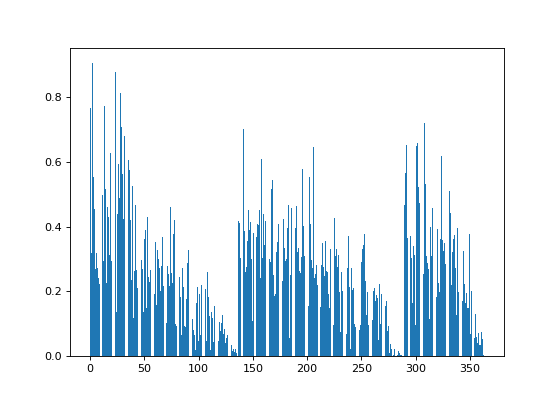

In [106]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_fao)
plt.show()

## Interdependence
Reachability is an important feature in networked systems.In single-layer networks it has to do with the existence
and length of shortest paths connecting pairs of nodes. In multi-level systems, shortest paths may significantly differ between diferent layers, and each layer and the aggregated topological networks as well. To capture
the multiplex contribution to the reachability of each unit of the network, the so-called node interdependence

### *European Airlines* Network

In [ ]:
inter_params_eu = im_eu.network_interdependence(im_eu.get_network_adjacency())

In [ ]:
"Network interdependence: {}".format(inter_params_eu[0])

In [ ]:
inter_eu = np.sort(inter_params_eu[1])
inter_arg_scores_eu = np.argsort(inter_params_eu[1])

In [ ]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_eu, inter_eu)
plt.show()

### *London Transportation Network* Network

In [111]:
inter_params_lt = im_lt.network_interdependence(im_lt.get_network_adjacency())

In [112]:
"Network interdependence: {}".format(inter_params[0])

'Network interdependence: 0.217859770144'

In [114]:
inter_lt = np.sort(inter_params_lt[1])
inter_arg_scores_lt = np.argsort(inter_params_lt[1])

<IPython.core.display.Javascript object>


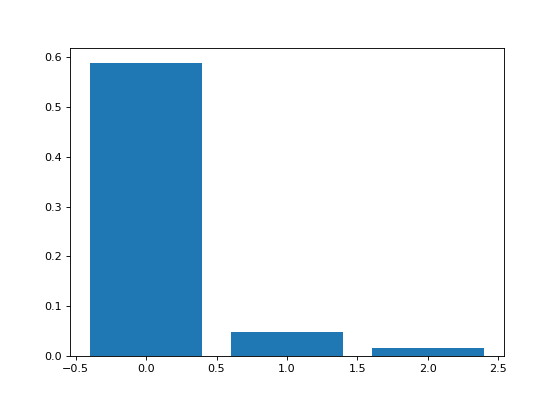

In [115]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(inter_arg_scores_lt, inter_lt)
plt.show()